# Project 3: Predicting Salary

## Introducing The Problem

According to the [Statista Research Department](https://www.statista.com/topics/789/wages-and-salary/#topicOverview), the average annual wage in 2021 was estimated to be $74,738. However, a study published by [Jenzabar](https://jenzabar.com/2021-education-and-employment-survey) in the same year, found that nearly half of American adults feel they're underpaid. To address this concern, I believe that promoting salary transparency can play a pivotal role in fighting underpayment. So, I aim to predict salaries based on factors like age, education, and experience. I also want to answer how much of an impact does education have on salary? Does education contribute more to salary than experience? By revealing how salaries are determined, we can help address the problem of underpayment and make the job market fairer for everyone.

## Introducing The Data

In [1]:
#import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Salary_Data.csv")
df = pd.DataFrame(data,columns = data.columns)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.shape

(6704, 6)

For this project, I'm going to be using a salary dataset found on [Kaggle](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data/data). This dataset includes 6,704 rows and 6 columns. The columns consist of age, years of experience, job title, education level, and salary.


## What Is Regression?

Regression is a statistical method used to model a target value based on independent predictors. The two types of regression we've talked about are linear regression and logistic regression. Linear regression is used to find the relationship between independent and dependent variables. Upon doing this, the regression model is then used to predict continuous values. Logistic regression is mainly used for classification purposes. Logistic regression usually has a finite number of outcomes/outputs, such as "spam" or "not spam."

In this project, I'm going to be utilizing linear regression. So, how does it work? First, we use the "least squares" method to fit a line to the data. The least squares method sums up the squared value of the individual residuals of a given line. This sum is sometimes called the sum of squared residuals. The line of best fit is found by looking for the slope and intercept of the line that best minimizes the sum of squared residuals.

After finding the line of best fit, we can use R^2, also known as the coefficient of determination, to tell us how much of our target can be explained by our features. In other words, how "good" is our line of best-fit.

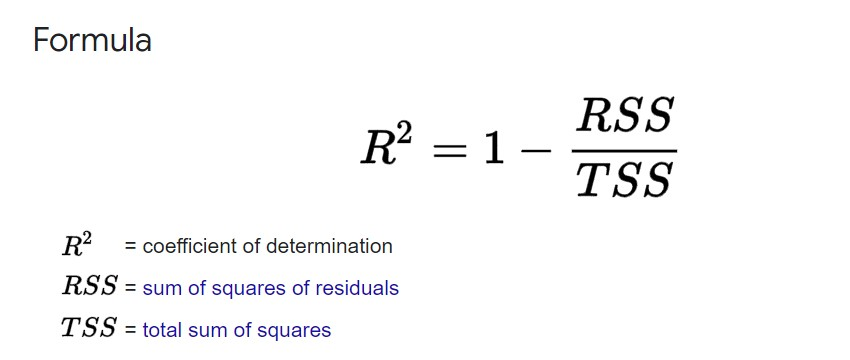

# Experiment 1

## Data Understanding

In [4]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


Before diving in, I decided to look at the mean and standard deviation for the numerical variables to get a better understanding of the data.

Text(0.5, 1.0, 'The Relationship Between Age and Salary')

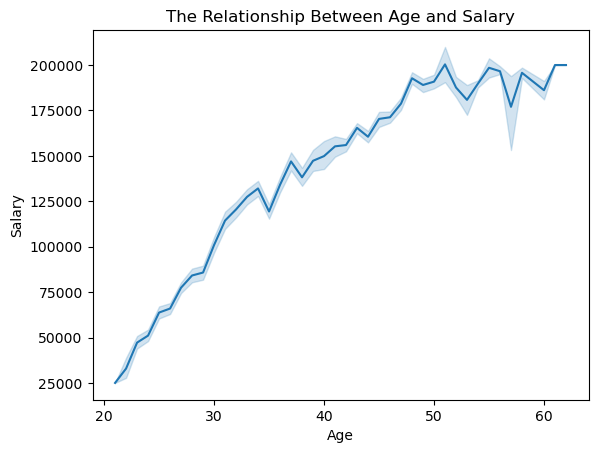

In [5]:
sns.lineplot(data=df, x="Age", y="Salary")
plt.title('The Relationship Between Age and Salary')

Then, I plotted the relationship between age and salary. As you can see, there is a strong positive correlation suggesting that as age increases, salary tends to increase as well.

Text(0.5, 1.0, 'Years of Experience vs Salary')

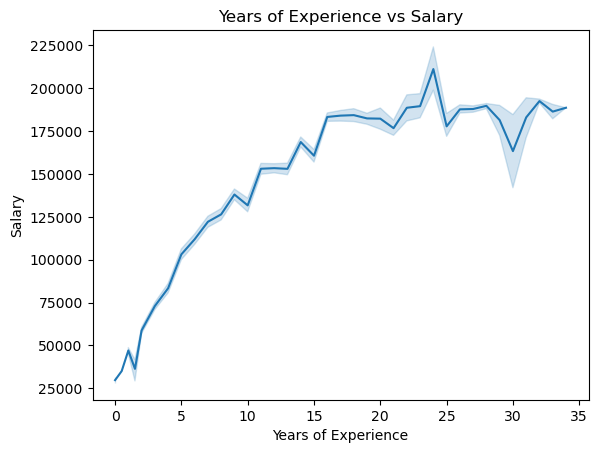

In [6]:
sns.lineplot(data=df, x="Years of Experience", y="Salary")
plt.title('Years of Experience vs Salary')

Next, I examined the relationship between years of experience and salary, which revealed a strong resemblance to the previous graph. This trend implies that individuals with more years of experience tend to have a higher salary.

The consistent, upward trajectory  depicted in the graphs underline the influence that both age and years of experience have over an individual's salary.

In [7]:
#Calculate the mean for males
df_other = df[(df['Gender'] == 'Other') & (df['Salary'].notnull())]
other_salary = df_other["Salary"].mean()

#Calculate the mean for females
df_female = df[(df['Gender'] == 'Female') & (df['Salary'].notnull())]
female_salary = df_female["Salary"].mean()

#Calculate the mean for other
df_other = df[(df['Gender'] == 'Other') & (df['Salary'].notnull())]
other_salary = df_other["Salary"].mean()

In [8]:
plt.bar(['Male','Female','Other'],[male_salary,female_salary,other_salary])
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Average Salary Comparison by Gender')

NameError: name 'male_salary' is not defined

Finally, I wanted to see how gender affects salary. This bar chart illustrates a comparison of average salaries across different gender categories. The bar for males depicts an average salary of around 120,000 USD, while the female category shows an average salary of around 110,000 USD. Additionally, the 'Other' category indicates an average salary floating around 125,000 USD. This visual representation highlights the disparities in average salaries among the different gender groups, emphasizing potential variations in earnings based on gender.

These visualizations made a strong argument to use age, years of experience, and gender in our regression model to predict salary. 

## Pre-Processing The Data

In [ ]:
df.isna().sum()

In [ ]:
df[df.isna().any(axis=1)]

Searching for nulls. We can drop the first two rows immediately.

In [ ]:
df = df.dropna(how='all')
df[df.isna().any(axis=1)]

Dropping the 3rd row due to insufficient amount of information to fill in the null values.

In [ ]:
df = df.drop(5247)
df[df.isna().any(axis=1)]

In [ ]:
df[df["Job Title"] == "Developer"]

I had planned to count the education levels for the 'Developer' job title and fill in the null value, but since this row is the only one with this job title, I'll drop it.

In [ ]:
df = df.drop(2011)
df[df.isna().any(axis=1)]

Now, for each of these rows, I'm going to take the average salary based on their education level, job title, and years of experience to fill in the null value.

In [ ]:
#Calculating the average salary for a full stack engineer with a masters and 8 years of experience
df_eng = df[(df['Education Level'] == 'Master\'s Degree') & (df['Job Title'] == 'Full Stack Engineer') & (df['Years of Experience'] == 8.0) & (df['Salary'].notnull())]
eng_salary = df_eng["Salary"].mean()

#Replacing the null value
df.loc[3136, ["Salary"]] = eng_salary
df.loc[3136]

In [ ]:
#Calculating the average salary for a sales director with a bachelor's and 6 years of experience
df_sales = df[(df['Education Level'] == 'Bachelor\'s Degree') & (df['Job Title'] == 'Sales Director') & (df['Years of Experience'] == 6.0) & (df['Salary'].notnull())]
sales_salary = df_sales["Salary"].mean()

#Replacing the null value
df.loc[6455, ["Salary"]] = sales_salary
df.loc[6455]

In [ ]:
#Dropping duplicates
df = df.drop_duplicates(keep="first")
df.shape

Dropping duplicates to reduce noise and prevent skewed results.

In [ ]:
df=df.drop(axis=1, columns="Job Title")
df.head()

Now, because regression models require numerical features, the "Job Title" column would have to undergo some encoding to be used. Although, considering the numerous job titles, this might introduce unnecessary complexity to the model. Therefore, I decided to drop the job title column altogether.

In [ ]:
df['Education Level'].unique()

In [ ]:
df.loc[df["Education Level"] == 'Bachelor\'s Degree', "Education Level"] = 'Bachelor\'s'
df.loc[df["Education Level"] == 'Master\'s Degree', "Education Level"] = 'Master\'s'
df.loc[df["Education Level"] == 'phD', "Education Level"] = 'PhD'

In [ ]:
df['Education Level'].unique()

I realized the education levels were redundant, so I categorized them into: 'High School', 'Bachelors', 'Masters', and 'PhD' for the sake of consistency.

In [ ]:
df = pd.get_dummies(df, columns = ['Gender', 'Education Level'])
df.head()

I proceeded to one-hot encode the non-numerical columns to use in our model.

## Modeling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
from sklearn.compose import ColumnTransformer

Before we build our model, we must standardize our numerical features.

In [ ]:
# Identify the columns to be scaled
columns_to_scale = ['Age', 'Years of Experience'] 

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaled', StandardScaler(), columns_to_scale)],
    remainder='passthrough'  # To keep the other columns unchanged
)

# Apply the transformation to the data
scaled = preprocessor.fit_transform(df)

# Convert the array to a data frame
X_scaled = pd.DataFrame(scaled,columns = df.columns)

Now, we can separate our features from the target and fit the model.

In [ ]:
#Separate the features and the target
X = X_scaled.drop(axis=1, columns="Salary")
y = X_scaled["Salary"]

#Training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

# initialize linear regression model
lr = linear_model.LinearRegression()

# fit the model with our X and y training sets
lr_model = lr.fit(X_train, y_train)

## Evaluation

In [ ]:
y_pred = lr_model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred,squared = False)

print('Mean Absolute Error:', mae)
print('Root Mean Square Error:', rmse)
print('Coefficient of Determination:', lr.score(X_test,y_test))

For the model evaluation, I used the mean absolute error and root mean squared error metrics. I chose these two metrics because they are in the units of our target variable, making them easier to interpret. For both metrics, the closer it is to zero, the less errors are in our model. The mean absolute error is 22,891 meaning our salary prediction is about 22,891 USD off from the actual value. The root mean squared error says our salary prediction is 29,645 USD off from the actual salary.

I also included the coefficient of determination show how the model explains the variance in the dependent variables based on the independent variable. The score suggests the model accounts for about 64.6% of the variability in the data, leaving approximately 35.4% unexplained by the model.

# Experiment 2

For this experiment, I am going to drop the years of experience column and compare the results from the previous experiment.

In [ ]:
X = X_scaled.drop(axis=1, columns=['Years of Experience', 'Salary'])
y = X_scaled["Salary"]
X.head()

In [ ]:
#Training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# initialize linear regression model
lr = linear_model.LinearRegression()

# fit the model with our X and y training sets
lr_model = lr.fit(X_train, y_train)

In [ ]:
y_pred = lr_model.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred,squared = False)

print('Mean Absolute Error:', mae)
print('Root Mean Square Error:', rmse)
print('Coefficient of Determination:', lr.score(X_test,y_test))

Using the metrics, this model's results looks similar to the first experiment's results. We can conclude that years of experience doesn't have much of an impact on this model.

# Experiment 3

For this experiment, I'm dropping the education columns and comparing the results from the previous experiments.

In [ ]:
X = X_scaled.drop(axis=1, columns=['Education Level_Bachelor\'s','Education Level_High School','Education Level_Master\'s','Education Level_PhD','Salary'])
y = X_scaled["Salary"]
X.head()

In [ ]:
#Training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

# initialize linear regression model
lr = linear_model.LinearRegression()

# fit the model with our X and y training sets
lr_model = lr.fit(X_train, y_train)

In [ ]:
y_pred = lr_model.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred,squared = False)

print('Mean Absolute Error:', mae)
print('Root Mean Square Error:', rmse)
print('Coefficient of Determination:', lr.score(X_test,y_test))

These metrics differ significantly from the previous two evaluations. Compared to the first experiment, both the mean absolute error and root mean squared error have increased by approximately 3,000. Moreover, the coefficient of determination demonstrates a substantial impact, dropping by 8%, from 64% to 58%. This experiment highlights the significant role of the 'education' feature in predicting salary, demonstrating its greater impact compared to experience.

## Impact

By demonstrating the significant impact of education on salary prediction, this project has the potential to inspire individuals who are undecided about furthering their education. The correlation between education level and salary prediction can serve as an incentive for those contemplating returning to school. Highlighting the higher salary associated with higher education might encourage individuals to invest in their education.

While showcasing the importance of education in salary prediction, it's essential to acknowledge that some individuals may face financial constraints that hinder their ability to pursue higher education. Individuals who aspire to pursue education but lack the financial means could become discouraged, potentially leading to a sense of decreased motivation to pursue professional growth.

## Conclusion

I saw first-hand how much weight some features have over others. In my case, education had the most influence. During the third experiment, I initially removed the 'age' column and conducted a comparison of the results. However, due to the similarity with the outcomes of the first two experiments, I replaced it with the 'education' column. I also learned how important it is to use multiple metrics because they vary and have their own advantages/disadvantages.

## References

- [Dataset](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data/data)
- [R-Squared formula](https://www.google.com/url?sa=i&url=https%3A%2F%2Fvitalflux.com%2Fr-squared-explained-machine-learning%2F&psig=AOvVaw1RveVMA5T2ohvfe3nddmGN&ust=1697658719560000&source=images&cd=vfe&opi=89978449&ved=0CBIQjhxqFwoTCNDPufHt_YEDFQAAAAAdAAAAABAI)
- [Column Transformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)